# Load Data

This file was included with the dataset and permit to load the dataset and display one of each class.

It has been modified in order to remove skimage dependency.

In [1]:
import glob, os 
# from skimage import io, transform
import numpy as np
import matplotlib.pyplot as plt

### Dataset path

In [2]:
path = "data/images/"
imlist = glob.glob(os.path.join(path, '*.jpg'))

In [3]:
def dataset(file_list, size=(300,180), flattened=False):
    '''
    Function to create a dataset. It will load all the images into a np.array 
    
    Parameters: 
    
    - file_list: List of all the images you want to include in the dataset. 
    - Size : Size of the images, by default is 180x300 which is the original size. 
    - flattened: By default is False. Creates a dataset, but each image get converted into a big vector. 
    
    Output: 
    
    data: it outputs the dataset as a big np array 
    labels : It outputs the binary label. 1 for pollen 0 for non pollen. 
    
    '''
    
    data = []
    for i, file in enumerate(file_list):
        image = plt.imread(file)
        #image = io.imread(file)
        #image = transform.resize(image, size, mode='constant') # .reshape(size) ??
        if flattened:
            image = image.flatten()

        data.append(image)

        
    # On Windows, replace path \ character by / :
    # TODO: use os.path.join() or pathlib library instead
    file_list = [f.replace("\\", "/") if "\\" in f else f for f in file_list]
    
    labels = [1 if f.split("/")[-1][0] == 'P' else 0 for f in file_list]
    

    return np.array(data), np.array(labels)

In [4]:
# Randomise the list of picture now because they are classified by name
np.random.shuffle(imlist)

# Load the dataset (may take a few seconds)
X,y = dataset(imlist)

datasetSize = X.shape[0]

### Dataset dimensions

In [5]:
# X has the following structure: X[imageid, y, x, channel]
print('X: ', X.shape)  # data
print('y: ', y.shape)  # target

X:  (714, 300, 180, 3)
y:  (714,)


In [6]:
print('Class 0: ', sum(y==0))
print('Class 1: ', sum(y==1))
print('Total  : ', len(y))
print(y)

Class 0:  345
Class 1:  369
Total  :  714
[0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1
 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1
 1 1 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 0
 1 1 1 0 1 0 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 1 0 0 1 1 0 1 1 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 1 0 1 1 1 1 0
 1 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0
 1 1 1 1 0 1 0 1 0 0 0 0 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 0 1 0 0 1 1 0 1 0
 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 1 1 0
 0 0 0 1 0 1 1 0 0 0 1 0 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 1 1 1
 1 1 1 1 1 0 0 1 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1
 1 1 0 1 1 0 1 1 1 1 0 1 1 0 1 0 1 0 1 0 1 1 1 1 1 0 0 1 1 1 0 1 0 0 0 1 1
 0 1 0 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1
 1 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 1

### Classes examples

In [7]:
%matplotlib inline

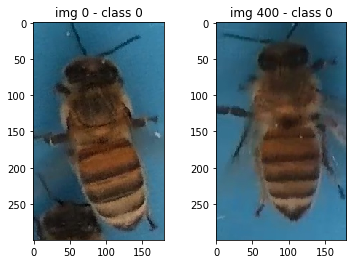

In [8]:
### /!\ ###########################################################
# NO LONGER RELEVANT since the dataset has been randomised upstream
###################################################################


fig, axes = plt.subplots(1,2)
k = 0
plt.sca(axes[0])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]))

k = 400 # datasetSize-1 -> last bee (X[datasetSize-1]) don't seems holding pollen.. ?
plt.sca(axes[1])
plt.imshow(X[k])
plt.title('img {} - class {}'.format(k, y[k]));

### TODO: Divide the dataset into training and validation set(s) (cross-validation ?)

In [9]:
# Division en subset : voir la fonction load_subSets() du TP3 corrigé

### TODO: Apply a more or less naive Bayesian on the training and validation data

### TODO: Display test/validation scores graphs of ... (train%test% ? speed ? nbIterations ?)

### BonusTODO: Implement PCA